In [3]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikofebrianur","key":"810ec23d2854ccf178bc5381ff137e66"}'}

In [4]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
# test kaggle dataset list
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                          Diabetes Dataset                                      9KB  2022-10-06 08:55:25          15989        466  1.0              
akshaydattatraykhare/data-for-admission-in-the-university      Data for Admission in the University                  4KB  2022-10-27 11:05:45           4049         90  1.0              
thedevastator/jobs-dataset-from-glassdoor                      Salary Prediction                                     3MB  2022-11-16 13:52:31            620         24  1.0              
swaptr/layoffs-2022                                            La

In [16]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d hassanamin/textdb3

textdb3.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
# unzip
!mkdir fake-news
!unzip textdb3.zip -d fake-news
!ls fake-news

Archive:  textdb3.zip
  inflating: fake-news/fake_or_real_news.csv  
fake_or_real_news.csv


# Load Datasets

In [18]:
# import pandas
import pandas as pd

In [24]:
# load dataset
df = pd.read_csv('fake-news/fake_or_real_news.csv', sep=',')
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [25]:
# data columns
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [27]:
# total data
df.shape

(6335, 4)

In [28]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [29]:
# categories
df.title.value_counts()

OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Dark Agenda Behind Globalism And Open Borders                                                     2
                                                                                                     ..
This Year’s Mammogram Month Launched With Devastating Report On Harms, Lack Of Effectiveness          1
Trump Reveals American Muslim Solution                                                                1
Fox News Gets Destroyed While Trying To Blame Hillary Clinton For GOP Email Scandal                   1
Jeh Johnson calls for increased vigilance after Mall of America 

In [30]:
# delete columns (unused column)
df_new = df.drop(columns=['Unnamed: 0'])
df_new

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Cleansing Data



In [31]:
# import and download package
import nltk, os, re, string

from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
# lower-case all characters
df_new.title = df_new.title.apply(lambda x: x.lower())
df_new.text = df_new.text.apply(lambda x: x.lower())
df_new.label = df_new.label.apply(lambda x: x.lower())

# removing functuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.title = df_new.title.apply(lambda x: cleaner(x))
    df_new.text = df_new.text.apply(lambda x: lem(x))
    df_new.label = df_new.label.apply(lambda x: lem(x))

## lematization
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.title = df_new.title.apply(lambda x: lem(x))
    df_new.text = df_new.text.apply(lambda x: lem(x))
    df_new.label = df_new.label.apply(lambda x: lem(x))

# removing number
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['title'].apply(rem_numbers)
    df_new['text'].apply(rem_numbers)
    df_new['label'].apply(rem_numbers)

# removing stopword
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df_new.title = df_new.title.apply(lambda x: stopword(x))
    df_new.text = df_new.text.apply(lambda x: lem(x))
    df_new.label = df_new.text.apply(lambda x: lem(x))

In [35]:
# view data after cleansing
df_new.head(10)

,title,text,label
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",fake
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,real
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",fake
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,real
5,"tehran, usa","\ni’m not an immigrant, but my grandparents ...",fake
6,girl horrified at what she watches boyfriend d...,"share this baylee luciani (left), screenshot o...",fake
7,‘britain’s schindler’ dies at 106,a czech stockbroker who saved more than 650 je...,real
8,fact check: trump and clinton at the 'commande...,hillary clinton and donald trump made some ina...,real
9,iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,real


# Model and Plot

In [37]:
# data category one-hot-encoding
label = pd.get_dummies(df_new.label)
df_new_cat = pd.concat([df_new, label], axis=1)
df_new_cat = df_new_cat.drop(columns='label')
df_new_cat.head(10)

,title,text,fake,real
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",1,0
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,1,0
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,0,1
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",1,0
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,0,1
5,"tehran, usa","\ni’m not an immigrant, but my grandparents ...",1,0
6,girl horrified at what she watches boyfriend d...,"share this baylee luciani (left), screenshot o...",1,0
7,‘britain’s schindler’ dies at 106,a czech stockbroker who saved more than 650 je...,0,1
8,fact check: trump and clinton at the 'commande...,hillary clinton and donald trump made some ina...,0,1
9,iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,0,1


In [38]:
# change dataframe value to numpy array
news = df_new_cat['title'].values + '' + df_new_cat['text'].values
label = df_new_cat[['fake', 'real']].values

In [39]:
# view news array
news

array(['you can smell hillary’s feardaniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. \nin the final stretch of the election, hillary rodham clinton has gone to war with the fbi. \nthe word “unprecedented” has been thrown around so often this election that it ought to be retired. but it’s still unprecedented for the nominee of a major political party to go war with the fbi. \nbut that’s exactly what hillary and her people have done. coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillary’s opponent in this election. \nthe fbi is under attack by everyone from obama to cnn. hillary’s people have circulated a letter attacking comey. there are currently more media hit pieces lambasting him than targeting trump. it wouldn’t be too surprising if the clintons or their allies were to start running attack ads against the fbi. \nthe fbi’s leader

In [40]:
# view label array
label

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [41]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [42]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sequence_train = tokenizer.texts_to_sequences(news_train)
sequence_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

In [43]:
# model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 435,586
Trainable params: 435,586
Non-trainable params: 0
_________________________________________________________________


In [44]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [47]:
# model fit
history = model.fit(padded_train, 
                    label_train, 
                    epochs=50, 
                    validation_data=(padded_test, label_test), 
                    verbose=2, 
                    callbacks=[callbacks], 
                    validation_steps=30)

Epoch 1/50
159/159 - 154s - loss: 0.4626 - accuracy: 0.7930 - val_loss: 0.5564 - val_accuracy: 0.7080 - 154s/epoch - 968ms/step
Epoch 2/50
159/159 - 152s - loss: 0.3403 - accuracy: 0.8625 - val_loss: 0.3674 - val_accuracy: 0.8358 - 152s/epoch - 958ms/step
Epoch 3/50
159/159 - 155s - loss: 0.1858 - accuracy: 0.9329 - val_loss: 0.3574 - val_accuracy: 0.8477 - 155s/epoch - 976ms/step
Epoch 4/50
159/159 - 154s - loss: 0.1156 - accuracy: 0.9576 - val_loss: 0.3068 - val_accuracy: 0.8990 - 154s/epoch - 971ms/step
Epoch 5/50
159/159 - 154s - loss: 0.0657 - accuracy: 0.9775 - val_loss: 0.3879 - val_accuracy: 0.8556 - 154s/epoch - 971ms/step
Epoch 6/50
159/159 - 156s - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.4362 - val_accuracy: 0.8895 - 156s/epoch - 980ms/step
Epoch 7/50

The accuracy of the training set and the validation set has reached > 90%!
159/159 - 155s - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.5078 - val_accuracy: 0.9006 - 155s/epoch - 974ms/step


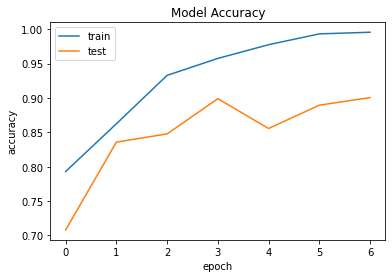

In [48]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

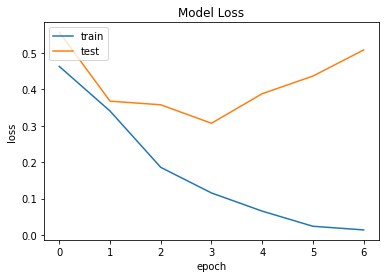

In [49]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()